In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('Datasets/titanic/titanic_train.csv')

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

# Mean/Median/Mode imputation

Use when data is MCAR(Missing completely at random)

In [5]:
def impute_missing_data(df,variable,median):
    df[variable+'_median']=df[variable].fillna(median)

In [6]:
median=df.Age.median()
impute_missing_data(df,"Age",median)

In [7]:
df=df[["Age","Survived","Age_median","Fare"]]

In [8]:
print(df.Age.std())
print(df.Age_median.std())

14.526497332334044
13.019696550973194


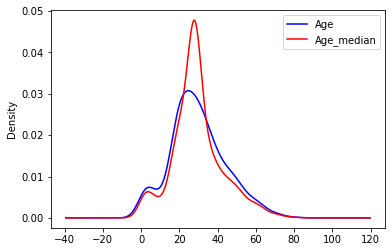

In [9]:
plt.figure()
df.Age.plot(kind='kde', color='blue', label='Age')
df.Age_median.plot(kind='kde', color='red', label='Age_median')
plt.legend()
plt.show()

# Random Sample Imputation

In [10]:
df=pd.read_csv('Datasets/titanic/titanic_train.csv',usecols=['Age','Fare','Survived'])

In [11]:
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [12]:
df.isnull().sum()

Survived      0
Age         177
Fare          0
dtype: int64

In [13]:
# Percentage of null values
df.isnull().mean()

Survived    0.000000
Age         0.198653
Fare        0.000000
dtype: float64

In [14]:
df[df.Age.isnull()].index

Int64Index([  5,  17,  19,  26,  28,  29,  31,  32,  36,  42,
            ...
            832, 837, 839, 846, 849, 859, 863, 868, 878, 888],
           dtype='int64', length=177)

In [15]:
df['Age'].dropna().sample(df.Age.isnull().sum())

253    30.0
729    25.0
835    39.0
719    33.0
600    24.0
       ... 
239    33.0
676    24.5
222    51.0
91     20.0
865    42.0
Name: Age, Length: 177, dtype: float64

In [16]:
df.loc[df.Age.isnull()]

,Survived,Age,Fare
5,0,NaN,8.4583
17,1,NaN,13.0000
19,1,NaN,7.2250
26,0,NaN,7.2250
28,1,NaN,7.8792
...,...,...,...
859,0,NaN,7.2292
863,0,NaN,69.5500
868,0,NaN,9.5000
878,0,NaN,7.8958


In [17]:
def random_sample_imputation(df,variable,median):
    df[variable+"_median"]=df[variable].fillna(median)
    df[variable+"_random"]=df[variable]
    random_samples=df[variable].dropna().sample(df[variable].isnull().sum())
    random_samples.index=df[df[variable].isnull()].index
    df.loc[df[variable].isnull(),variable+"_random"]=random_samples

In [18]:
random_sample_imputation(df,"Age",df.Age.median())

In [19]:
df.head()

,Survived,Age,Fare,Age_median,Age_random
0,0,22.0,7.2500,22.0,22.0
1,1,38.0,71.2833,38.0,38.0
2,1,26.0,7.9250,26.0,26.0
3,1,35.0,53.1000,35.0,35.0
4,0,35.0,8.0500,35.0,35.0


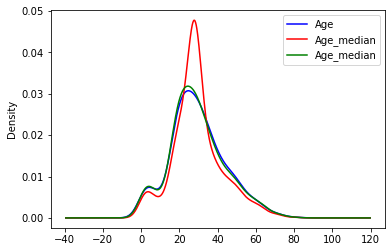

In [20]:
plt.figure()
df.Age.plot(kind='kde', color='blue', label='Age')
df.Age_median.plot(kind='kde', color='red', label='Age_median')
df.Age_random.plot(kind='kde', color='green', label='Age_median')
plt.legend()
plt.show()

# Capturing NaN values with a new feature

In [21]:
df=pd.read_csv("Datasets/titanic/titanic_train.csv",usecols=["Survived","Age","Fare"])

In [22]:
df

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500
...,...,...,...
886,0,27.0,13.0000
887,1,19.0,30.0000
888,0,NaN,23.4500
889,1,26.0,30.0000


In [23]:
df["Age_NAN"]=np.where(df.Age.isnull(),1,0)

In [24]:
df.head()

,Survived,Age,Fare,Age_NAN
0,0,22.0,7.2500,0
1,1,38.0,71.2833,0
2,1,26.0,7.9250,0
3,1,35.0,53.1000,0
4,0,35.0,8.0500,0


# End of Distribution Imputation

In [25]:
df=pd.read_csv("Datasets/titanic/titanic_train.csv",usecols=["Survived","Age","Fare"])

In [26]:
extreme=df.Age.mean()+3*df.Age.std()

In [27]:
extreme

73.27860964406095

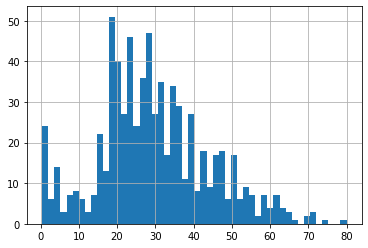

In [28]:
df.Age.hist(bins=50)

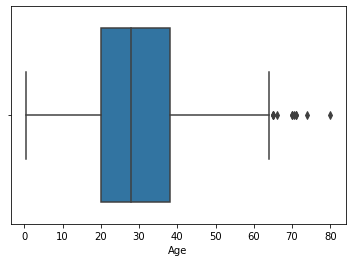

In [29]:
sns.boxplot(df.Age)

In [30]:
def impute_nan(df,variable,median,extreme):
    df[variable+"_end_distribution"]=df[variable].fillna(extreme)
    df[variable].fillna(median,inplace=True)

In [31]:
impute_nan(df,"Age",median,extreme)

In [32]:
df.head()

,Survived,Age,Fare,Age_end_distribution
0,0,22.0,7.2500,22.0
1,1,38.0,71.2833,38.0
2,1,26.0,7.9250,26.0
3,1,35.0,53.1000,35.0
4,0,35.0,8.0500,35.0


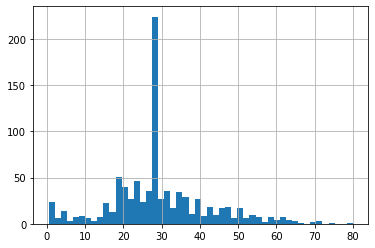

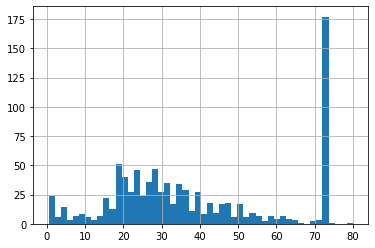

In [36]:
df.Age.hist(bins=50)
plt.show()
df.Age_end_distribution.hist(bins=50)
plt.show()

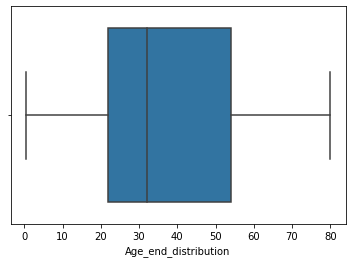

In [34]:
sns.boxplot(df.Age_end_distribution)

# Arbitary Value Imputation

In [42]:
df=pd.read_csv("Datasets/titanic/titanic_train.csv",usecols=["Age","Fare","Survived"])

In [43]:
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [45]:
df["Age_random"]=df["Age"].fillna(100)

In [46]:
df.head()

,Survived,Age,Fare,Age_random
0,0,22.0,7.2500,22.0
1,1,38.0,71.2833,38.0
2,1,26.0,7.9250,26.0
3,1,35.0,53.1000,35.0
4,0,35.0,8.0500,35.0


# Handling Categorical missing values

### Frequent Category Imputation

In [49]:
df=pd.read_csv("Datasets/adv_house_price_prediction/train.csv",usecols=["BsmtQual","FireplaceQu","GarageType","SalePrice"])

In [50]:
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice
0,Gd,NaN,Attchd,208500
1,Gd,TA,Attchd,181500
2,Gd,TA,Attchd,223500
3,TA,Gd,Detchd,140000
4,Gd,TA,Attchd,250000


In [52]:
df.isnull().sum()

BsmtQual        37
FireplaceQu    690
GarageType      81
SalePrice        0
dtype: int64

In [55]:
df.BsmtQual.mode()

0    TA
dtype: object

BsmtQual       1423
FireplaceQu     770
GarageType     1379
SalePrice      1460
dtype: int64

In [62]:
df.groupby(['BsmtQual'])["BsmtQual"].count()

BsmtQual
Ex    121
Fa     35
Gd    618
TA    649
Name: BsmtQual, dtype: int64

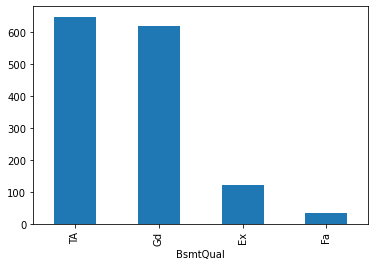

In [64]:
df.groupby(['BsmtQual'])["BsmtQual"].count().sort_values(ascending=False).plot.bar()

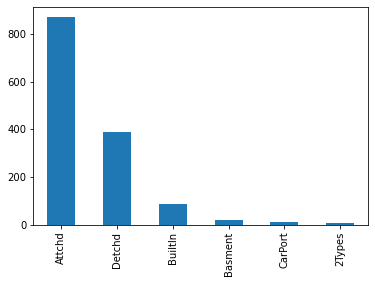

In [65]:
df.GarageType.value_counts().plot.bar()

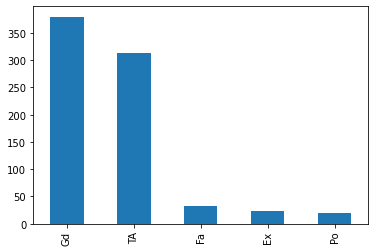

In [66]:
df.FireplaceQu.value_counts().plot.bar()

In [68]:
df.BsmtQual.value_counts().index[0]

'TA'

In [69]:
def impute_nan(df,variable):
    most_freq_value=df[variable].value_counts().index[0]
    df[variable].fillna(most_freq_value,inplace=True)

In [70]:
for feature in df.columns:
    if feature !="SalePrice":
        impute_nan(df,feature)

In [72]:
df.isnull().mean()

BsmtQual       0.0
FireplaceQu    0.0
GarageType     0.0
SalePrice      0.0
dtype: float64

### Adding a variable to catch NaN

In [74]:
df=pd.read_csv("Datasets/adv_house_price_prediction/train.csv",usecols=["BsmtQual","FireplaceQu","GarageType","SalePrice"])

In [75]:
frequent=df.BsmtQual.mode()[0]

In [76]:
frequent

'TA'

In [77]:
df["BSMTQUal_new"]=np.where(df.BsmtQual.isnull(),1,0)
df["BsmtQual"].fillna(frequent,inplace=True)

In [78]:
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice,BSMTQUal_new
0,Gd,NaN,Attchd,208500,0
1,Gd,TA,Attchd,181500,0
2,Gd,TA,Attchd,223500,0
3,TA,Gd,Detchd,140000,0
4,Gd,TA,Attchd,250000,0


In [79]:
for feature in ['FireplaceQu','GarageType']:
    df[feature+"_new"]=np.where(df[feature].isnull(),1,0)
    df[feature].fillna(df[feature].mode()[0])

In [80]:
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice,BSMTQUal_new,FireplaceQu_new,GarageType_new
0,Gd,NaN,Attchd,208500,0,1,0
1,Gd,TA,Attchd,181500,0,0,0
2,Gd,TA,Attchd,223500,0,0,0
3,TA,Gd,Detchd,140000,0,0,0
4,Gd,TA,Attchd,250000,0,0,0


## Suppose we have more frequent categories, we can consider NaN a feature

In [87]:
df=pd.read_csv("Datasets/adv_house_price_prediction/train.csv",usecols=["BsmtQual","FireplaceQu","GarageType","SalePrice"])

In [88]:
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice
0,Gd,NaN,Attchd,208500
1,Gd,TA,Attchd,181500
2,Gd,TA,Attchd,223500
3,TA,Gd,Detchd,140000
4,Gd,TA,Attchd,250000


In [89]:
for feature in df.columns:
    if feature!="SalePrice":
        df[feature+"_new"]=np.where(df[feature].isnull(),"Missing",df[feature])

In [90]:
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice,BsmtQual_new,FireplaceQu_new,GarageType_new
0,Gd,NaN,Attchd,208500,Gd,Missing,Attchd
1,Gd,TA,Attchd,181500,Gd,TA,Attchd
2,Gd,TA,Attchd,223500,Gd,TA,Attchd
3,TA,Gd,Detchd,140000,TA,Gd,Detchd
4,Gd,TA,Attchd,250000,Gd,TA,Attchd


In [91]:
df=df.drop(["BsmtQual","FireplaceQu","GarageType"],axis=1)

In [93]:
df.head()

,SalePrice,BsmtQual_new,FireplaceQu_new,GarageType_new
0,208500,Gd,Missing,Attchd
1,181500,Gd,TA,Attchd
2,223500,Gd,TA,Attchd
3,140000,TA,Gd,Detchd
4,250000,Gd,TA,Attchd
